In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  C:\Users\Shimul\Documents\Building CSE 4000 Thesis


## Dataset path location using glob

In [2]:
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')


In [3]:
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))

Building house data :  216
Mosque data:  324
Temple data:  263
Tinshed data:  187


In [4]:
dataset_classes=[building_house,mosque,temple,tinshed]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  4


## Dataset Preprocessing using ImageDataGenerator

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
image_generator = ImageDataGenerator(rescale=1/255,
                                    horizontal_flip=True,
                                    shear_range=0.2 ,
                                    zoom_range=0.2,
                                    rotation_range=45,
                                    height_shift_range=0.5,
                                    fill_mode='nearest',
                                    validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building',
                                                 shuffle=True,
                                                 target_size=(224, 224),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 794 images belonging to 4 classes.
Found 196 images belonging to 4 classes.


## Import Mobile Net v2

In [8]:
from tensorflow.keras.applications import MobileNetV2

In [9]:
base_model=MobileNetV2(input_shape=(224,224,3),include_top=False)

9412608/9406464 [==============================] - 12s 1us/step


In [11]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [12]:
base_model.trainable=False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.5,
        horizontal_flip=True,
        brightness_range=[1.0,2.0],
        #validation_split=0.5
        )
train_generator = train_datagen.flow_from_directory(
        r'/mydrive/dataset/FDataset/training',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32,
        shuffle=True,
        class_mode='categorical',
        seed=42,
        #subset="training",
        #save_to_dir=r'C:\Users\Mahmudul Hasan\AppData\Local\Programs\Python\Python38\Scripts\training set\cars',
        #save_prefix='',
        #save_format='png'
        )

In [13]:
model = tensorflow.keras.Sequential([
  base_model,
  tensorflow.keras.layers.GlobalAveragePooling2D(),
  tensorflow.keras.layers.Dense(total_class, activation='sigmoid')
])

base_model.summary()

NameError: name 'tensorflow' is not defined

## Make dataset and labels using keras.preprocessing.image

## Length of the data and types

In [37]:
print('Total data: ',len(data))
print('Labels of data: ',len(labels))

Total data:  990
Labels of data:  990


In [38]:
print('Data type: ',type(data))
print('Labels type: ',type(labels))

Data type:  <class 'list'>
Labels type:  <class 'list'>


## Convert the list into numpy array

In [39]:
data_array=np.array(data)
labels_array=np.array(labels)

In [40]:
print('Data type: ',type(data_array))
print('Labels type: ',type(labels_array))

Data type:  <class 'numpy.ndarray'>
Labels type:  <class 'numpy.ndarray'>


## Data split using sklearn train_test_split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test =train_test_split(data_array,labels_array,test_size=0.2,random_state=42)

In [43]:
print('x train shape: ',x_train.shape)
print('x test shape: ',x_test.shape)
print('y train shape: ',y_train.shape)
print('y test shape: ',y_test.shape)

x train shape:  (792, 224, 224, 3)
x test shape:  (198, 224, 224, 3)
y train shape:  (792,)
y test shape:  (198,)


## plot random image and label
if range(0,255) ->  int then plt.imshow(img)

range(0.0,255.0) ->float scale the image into (0,1) by dividing 255 then plt.imshow()

In [44]:
random_image=x_train[0]
random_image_labels=y_train[0]
print('image shape: ',random_image.shape)
print('Data types of image is : ',random_image.dtype)
print('image output label: ',random_image_labels)

image shape:  (224, 224, 3)
Data types of image is :  float32
image output label:  3


Label:  3


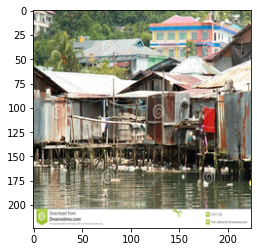

In [45]:
print('Label: ',random_image_labels)
plt.imshow(random_image/255)
plt.show()

## Normalize the data for training
x_test -> [0,1]


In [46]:
print('Data range is [0,255]: ',x_train[0][0][0])

Data range is [0,255]:  [237. 216. 179.]


In [47]:
x_test_normalize=x_test/255
x_train_normalize=x_train/255

In [48]:
print('Data range is [0,1]: ',x_train_normalize[0][0][0])

Data range is [0,1]:  [0.92941177 0.84705883 0.7019608 ]


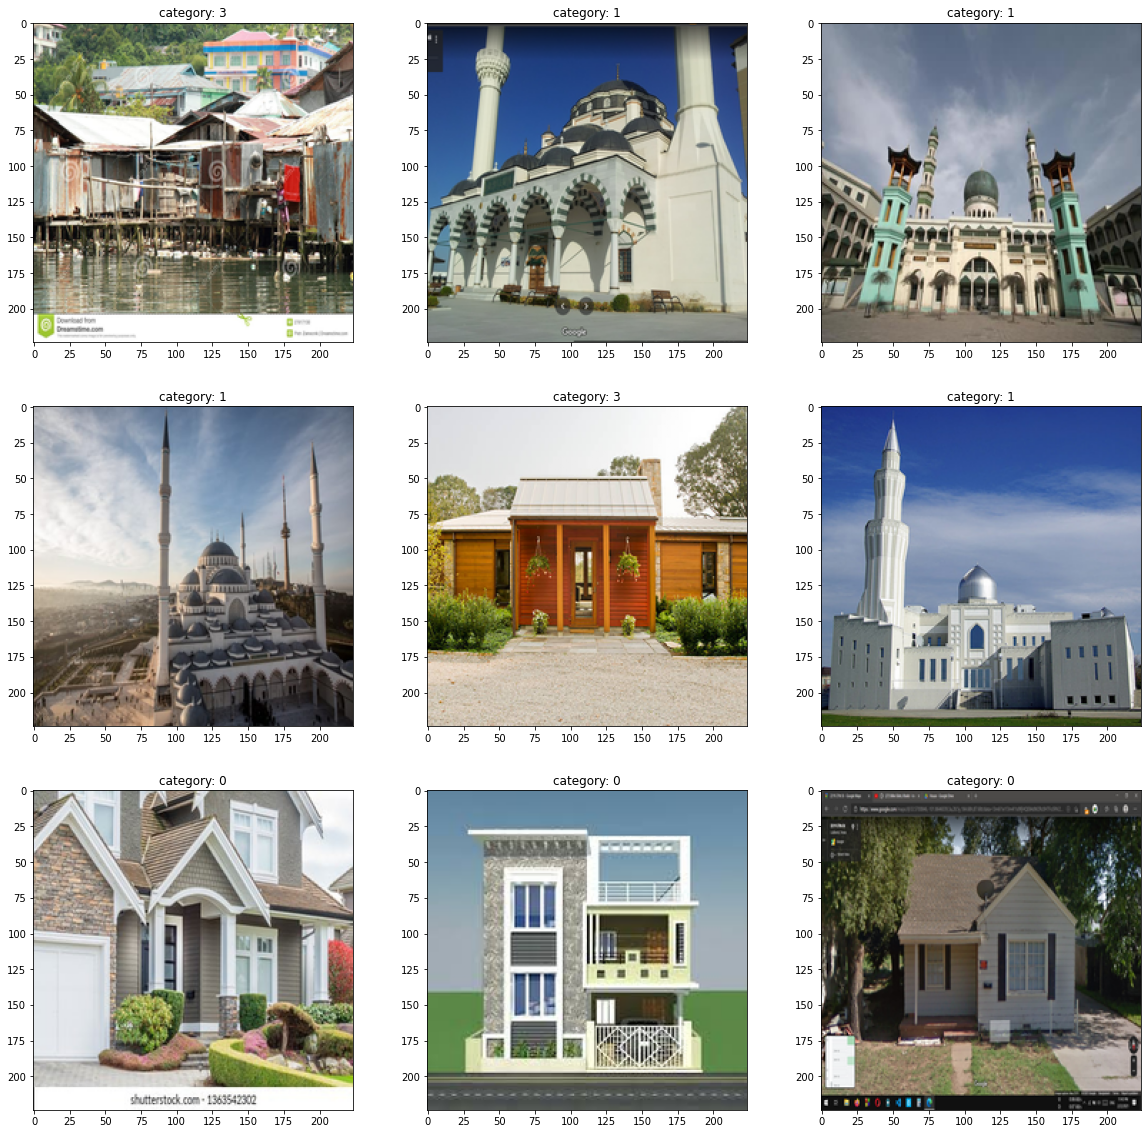

In [49]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train_normalize[i])
    plt.title('category: '+str(y_train[i]))
plt.show()

## Categorial the labels using one hot encoding Keras

In [50]:
from tensorflow.keras.utils import to_categorical


In [51]:
print('Non categorical values : ',y_test[:10])

Non categorical values :  [1 2 2 1 1 2 1 1 1 2]


### categorical y_test and y_train

In [52]:
y_test_categorical=to_categorical(y_test)
y_train_categorical=to_categorical(y_train)

In [53]:
print('Categorical values : \n',y_test_categorical[:10])

Categorical values : 
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]



## Define model architecture
### CNN requires x_test norlalize values [0,1] and y_test categorical values [0. 0. 1. 0.]

In [54]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

In [55]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(total_class,activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [33]:
model.layers

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Compile the model using loss and optimizer

In [34]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Train the model and save the model suing call backs fucntion

In [35]:
import tensorflow

In [36]:
tensorflow.config.run_functions_eagerly(True)

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [38]:
checkpointer.filepath

'building.model.best.hdf5'

In [39]:
x_test_normalize.shape

(314, 224, 224, 3)

In [40]:
y_test_categorical.shape

(314, 4)

In [41]:
history=model.fit(x_test_normalize,y_test_categorical,epochs=100,batch_size=32,steps_per_epoch=3,callbacks=[checkpointer])

C:\Users\Shimul\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/100
3/3 [==============================] - 4s 1s/step - loss: 2.8090 - accuracy: 0.2188
Epoch 2/100
3/3 [==============================] - 4s 1s/step - loss: 1.3747 - accuracy: 0.2812
Epoch 3/100
3/3 [==============================] - 4s 1s/step - loss: 1.3732 - accuracy: 0.3021
Epoch 4/100
3/3 [==============================] - 5s 2s/step - loss: 1.4005 - accuracy: 0.2667
Epoch 5/100
3/3 [==============================] - 5s 2s/step - loss: 1.3767 - accuracy: 0.3021
Epoch 6/100
3/3 [==============================] - 4s 1s/step - loss: 1.3629 - accuracy: 0.3958
Epoch 7/100
3/3 [==============================] - 4s 1s/step - loss: 1.3290 - accuracy: 0.4111
Epoch 8/100
3/3 [==============================] - 4s 1s/step - loss: 1.3491 - accuracy: 0.2083
Epoch 9/100
3/3 [==============================] - 4s 1s/step - loss: 1.3802 - accuracy: 0.2604
Epoch 10/100
3/3 [==============================] - 4s 1s/step - loss: 1.3338 - accuracy: 0.4333
Epoch 11/100
3/3 [=====================

3/3 [==============================] - 5s 2s/step - loss: 0.4465 - accuracy: 0.8021
Epoch 34/100
3/3 [==============================] - 5s 2s/step - loss: 0.4360 - accuracy: 0.8000
Epoch 35/100
3/3 [==============================] - 5s 2s/step - loss: 0.4281 - accuracy: 0.8750
Epoch 36/100
3/3 [==============================] - 5s 2s/step - loss: 0.3506 - accuracy: 0.9062
Epoch 37/100
3/3 [==============================] - 4s 1s/step - loss: 0.2681 - accuracy: 0.9111
Epoch 38/100
3/3 [==============================] - 5s 2s/step - loss: 0.2351 - accuracy: 0.9271
Epoch 39/100
3/3 [==============================] - 5s 2s/step - loss: 0.3383 - accuracy: 0.8750
Epoch 40/100
3/3 [==============================] - 5s 2s/step - loss: 0.2528 - accuracy: 0.9111
Epoch 41/100
3/3 [==============================] - 5s 2s/step - loss: 0.0980 - accuracy: 1.0000
Epoch 42/100
3/3 [==============================] - 5s 2s/step - loss: 0.3464 - accuracy: 0.8542
Epoch 43/100
3/3 [=========================

3/3 [==============================] - 4s 1s/step - loss: 0.1050 - accuracy: 0.9444
Epoch 98/100
3/3 [==============================] - 5s 2s/step - loss: 0.1165 - accuracy: 0.9688
Epoch 99/100
3/3 [==============================] - 5s 2s/step - loss: 0.0120 - accuracy: 1.0000
Epoch 100/100
3/3 [==============================] - 4s 1s/step - loss: 0.0504 - accuracy: 0.9778


## Testing data using test set

In [42]:
score=model.evaluate(x_test_normalize,y_test_categorical)
score

10/10 [==============================] - 7s 665ms/step - loss: 0.0054 - accuracy: 1.0000


[0.0053986310958862305, 1.0]

In [43]:
print('Accuracy of the model is : ',score[1]*100)

Accuracy of the model is :  100.0


## plot accuracy and loss graph

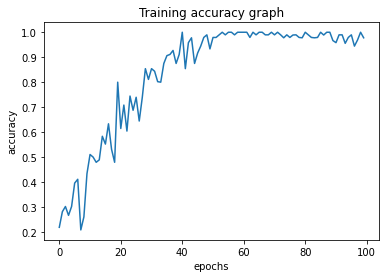

In [44]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'])

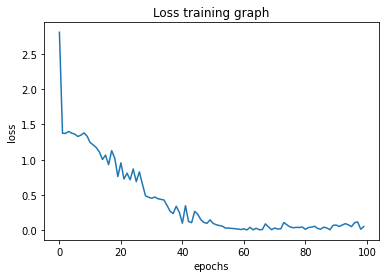

In [45]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'])

## Evaluate the model using test image
- class 0: building house
- class 1: mosque
- class 2: temple
- class 4: tinshed

(1, 224, 224, 3)
[[0. 0. 0. 1.]]
True classification


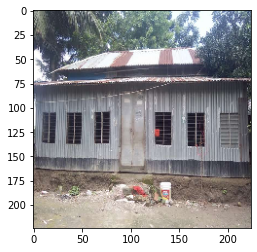

In [46]:
random_image=image.load_img('tinshed19.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print('True classification')

(1, 224, 224, 3)
[[1. 0. 0. 0.]]
True classification


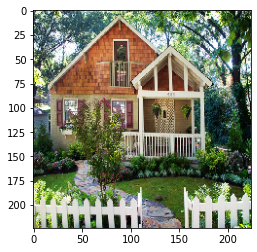

In [47]:
random_image=image.load_img('building0.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print('True classification')

(1, 224, 224, 3)
[[1. 0. 0. 0.]]
True classification


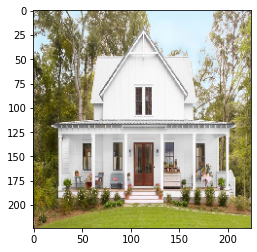

In [48]:
random_image=image.load_img('building1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print('True classification')

(1, 224, 224, 3)
[[1. 0. 0. 0.]]
False classification


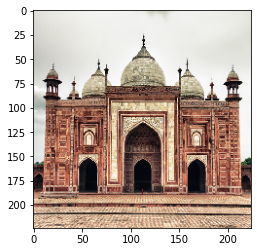

In [49]:
random_image=image.load_img('mosque35.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print('False classification')

## Classification report

In [50]:
predicted_y=model.predict(x_test)
print(predicted_y.shape)

(314, 4)


In [51]:
y_test_categorical.shape

(314, 4)

In [52]:
predicted_y=np.argmax(predicted_y, axis=1)
predicted_y.shape

(314,)

In [53]:
y_test.shape

(314,)

In [54]:
from sklearn.metrics import classification_report
print('Classification report \n',classification_report(predicted_y,y_test))

Classification report 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93        95
           1       0.97      0.92      0.94        91
           2       0.82      1.00      0.90        64
           3       0.94      0.95      0.95        64

    accuracy                           0.93       314
   macro avg       0.93      0.94      0.93       314
weighted avg       0.94      0.93      0.93       314



In [2]:
import tensorflow_hub as hub